In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
data_artificial = genfromtxt('/content/drive/MyDrive/AM/artificial1d.csv', delimiter = ',')

### Questão 1

#### Funções gerais

In [3]:
alpha = 0.01

In [4]:
x = data_artificial[:, 0]
y = data_artificial[:, 1]

In [ ]:
X = np.c_[np.ones_like(x), x] 

#### Letra A

In [ ]:
def MSE(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

In [ ]:
def OLS(X, y):

  w = np.linalg.solve(X.T @ X, X.T @ y)
  y_pred = X @ w
  MSE(y, y_pred)

  print("W: ", w)
  print("MSE: ", MSE)

  return w, MSE

W:  [0.06761792 1.57486517]
MSE:  <function MSE at 0x7fda5ce68940>


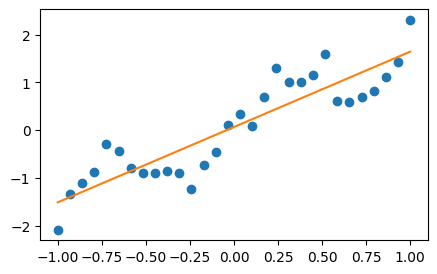

In [ ]:
w, mse = OLS(X, y)

plt.figure(figsize=(5, 3))
plt.plot(x, y, 'o')
plt.plot(x, X @ w)
plt.show()

#### Letra B

In [ ]:
def gradient_descent(X, y, alpha, epocas):

  w = np.zeros(X.shape[1])
  mse = np.zeros(epocas)

  linhas = X.shape[0]

  for t in range(epocas):
    y_pred = X @ w
    erro = y - y_pred
    mse[t] = np.mean(erro ** 2)
    w = w + (alpha/linhas) * (erro @ X)

  plt.figure(figsize=(5, 3))
  plt.plot(mse)
  plt.show()
  print("W: ", w)
  print("MSE: ", mse[-1])
  
  return w, mse

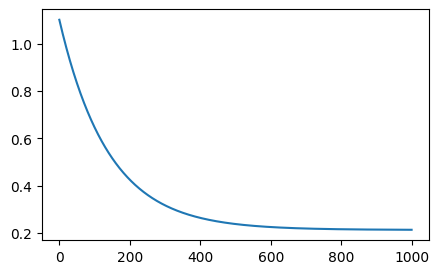

W:  [0.06761501 1.53050495]
MSE:  0.21410710564525054


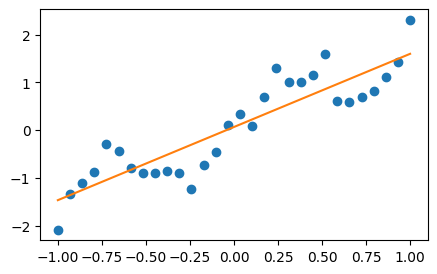

In [ ]:
w, MSE = gradient_descent(X, y, alpha, epocas = 1000)

plt.figure(figsize=(5, 3))
plt.plot(x, y, 'o')
plt.plot(x, X @ w)
plt.show()

#### Letra C

In [ ]:
def stochastic_gradient_descent(X, y, alpha, epocas):
  w = np.zeros(X.shape[1])
  mse = np.zeros(epocas)
  linhas = X.shape[0]

  for t in range(epocas):
    for i in np.random.permutation(y.shape[0]):
      y_pred = X[i] @ w
      erro = y[i] - y_pred
      mse[t] = mse[t] + erro ** 2
      w = w + alpha * erro * X[i] 

  mse = mse / linhas

  plt.figure(figsize=(5, 3))
  plt.plot(mse)
  plt.show()
  print("W:", w)
  print("MSE: ", mse[-1])
  return w, mse

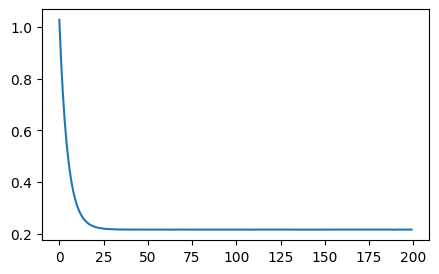

W: [0.0664765  1.57392835]
MSE:  0.21619027397518484


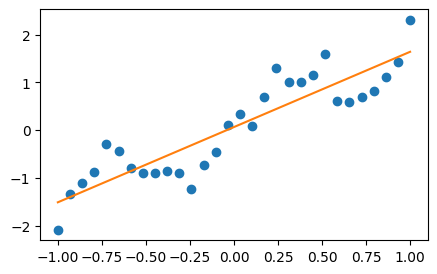

In [ ]:
w, MSE = stochastic_gradient_descent(X, y, alpha, epocas = 200)

plt.figure(figsize=(5, 3))
plt.plot(x, y, 'o')
plt.plot(x, X @ w)
plt.show()

### Questão 2

In [ ]:
data_california = genfromtxt('/content/drive/MyDrive/AM/california.csv', delimiter = ',')

#### Letra A

In [ ]:
def train_test_split(data):

    np.random.shuffle(data)

    n_amostras = data.shape[0]
    n = int(0.8 * n_amostras)
    treino = data[:n]
    teste = data[n:]

    return treino, teste

#### Letra B

In [ ]:
def generate_polynomial(data, grau):

    l = data.shape[0]
    c = data.shape[1]
    X = np.ones((l, 1))
    
    for i in range(c - 1):
        for j in range(grau):
            X = np.c_[X, data[:, [i]] ** (j + 1)]

    return X, data[:, -1]

In [ ]:
def normalize(X, y):

    X_max = np.max(X, axis=0)
    X_min = np.min(X, axis=0)
    y_max = np.max(y, axis=0)
    y_min = np.min(y, axis=0)

    X_normalizado = (X - X_min)/(X_max - X_min)
    y_normalizado = (y - y_min)/(y_max - y_min)

    X_normalizado[:, 0] = 1

    return X_normalizado, y_normalizado, X_max, X_min, y_max, y_min

In [ ]:
def polynomial_regression(data, grau, lambdaa, treino, teste):

  X_treino, y_treino = generate_polynomial(treino, grau)
  X_teste, y_teste = generate_polynomial(teste, grau)

  X_tr_normal, y_tr_normal, Xmax, Xmin, ymax, ymin = normalize(X_treino, y_treino)

  w = np.linalg.solve(X_tr_normal.T @ X_tr_normal + lambdaa*np.eye(X_tr_normal.shape[1]), X_tr_normal.T @ y_tr_normal)

  X_test_normal = (X_teste - Xmin)/(Xmax - Xmin)
  X_test_normal[:, 0] = 1

  y_tr_pred = X_tr_normal @ w
  y_tes_pred = X_test_normal @ w

  y_tr_desnormal = y_tr_pred*(ymax - ymin) + ymin
  y_te_desnormal = y_tes_pred*(ymax - ymin) + ymin

  rmse_treino = np.sqrt(np.mean((y_treino - y_tr_desnormal) ** 2))
  rmse_teste = np.sqrt(np.mean((y_teste - y_te_desnormal) ** 2))

  return w, rmse_treino, rmse_teste

In [ ]:
w = []
rmse_treino = []
rmse_teste = []

treino, teste = train_test_split(data_california)

for degree in range(1,14):
    wT, rmse_treino_t, rmse_teste_t = polynomial_regression(data_california, degree, 0, treino, teste)

    w.append(wT)
    rmse_treino.append(rmse_treino_t)
    rmse_teste.append(rmse_teste_t)

<ipython-input-283-503343631777>:8: RuntimeWarning: invalid value encountered in true_divide
  X_normalizado = (X - X_min)/(X_max - X_min)
<ipython-input-284-419e2737c4a9>:10: RuntimeWarning: invalid value encountered in true_divide
  X_test_normal = (X_teste - Xmin)/(Xmax - Xmin)


#### Letra C)

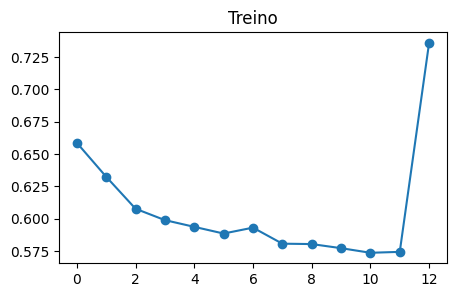

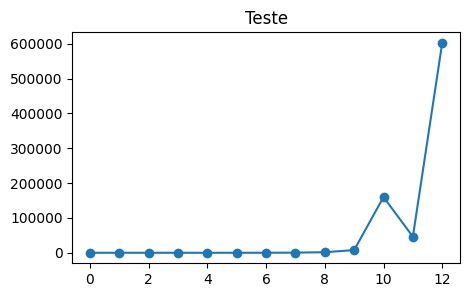

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(rmse_treino, marker='o')
plt.title('Treino')
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(rmse_teste, marker='o')
plt.title('Teste')
plt.show()

#### Letra D)

In [ ]:
w = []
rmse_treino = []
rmse_teste = []

treino, teste = train_test_split(data_california)
for degree in range(1, 14):
    wT, rmse_treino_t, rmse_teste_t = polynomial_regression(data_california, degree, 0.01, treino, teste)

    w.append(wT)
    rmse_treino.append(rmse_treino_t)
    rmse_teste.append(rmse_teste_t)

<ipython-input-283-503343631777>:8: RuntimeWarning: invalid value encountered in true_divide
  X_normalizado = (X - X_min)/(X_max - X_min)
<ipython-input-284-419e2737c4a9>:10: RuntimeWarning: invalid value encountered in true_divide
  X_test_normal = (X_teste - Xmin)/(Xmax - Xmin)


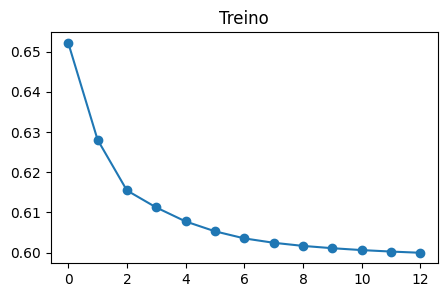

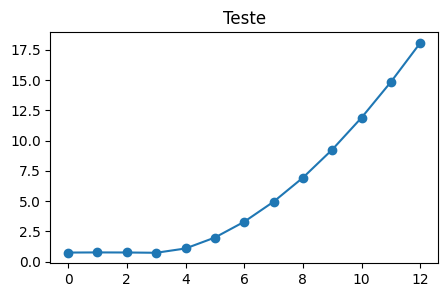

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(rmse_treino, marker='o')
plt.title('Treino')
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(rmse_teste, marker='o')
plt.title('Teste')
plt.show()